In [1]:
from src.utils import get_signal_by_type, eye_experiment_sa_start
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

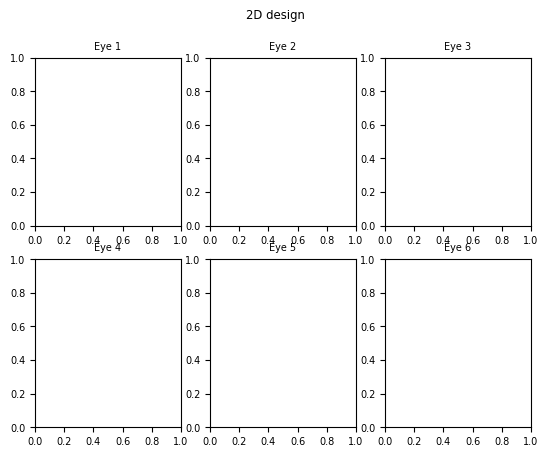

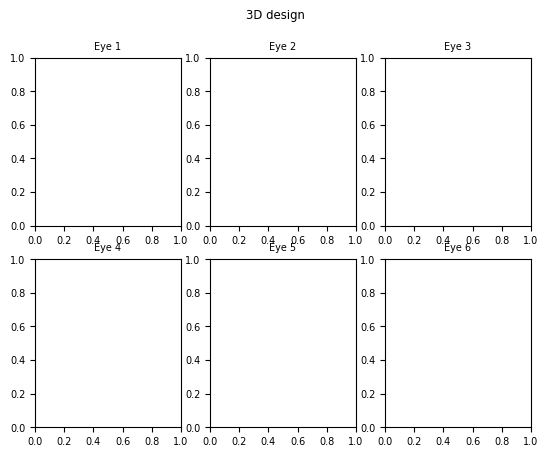

In [4]:
# for each dataset, get model, predict for all designs, eyes and experiments.
# save results

model_name = 'LinearRegression'
results_file = 'real_data_preds.csv'

#datasets = [x for x in os.listdir('simulated_data') if x.startswith('DS')]

datasets = ['DS_-10_10_10', 'DS_-10_80_10', 'DS_0_10_10']

#for dataset in datasets:


sa_length = 300
response_length = 2700
experiment_length = sa_length + response_length
max_stimuli = 120
channel_id = 0

for i, design in enumerate(['2D', '3D']):
    fig, axs = plt.subplots(2, 3)
    fig.suptitle(f'{design} design')
    for eye in range(1, 7):
        eye_idx = eye-1
        ax = axs[eye_idx//3, eye_idx%3].
        ax.set_title(f'Eye {eye}')
        for j, dataset in enumerate(datasets):
            model = pickle.load(open(f'../models/{model_name}_{dataset}.pkl', 'rb'))
            boxes = []
            for k, experiment in enumerate(['stimulated', 'non-stimulated', 'TTX']):
                time, signal = get_signal_by_type(eye=eye, design=design, experiment=experiment, verbose=0)
                signal = signal[:, channel_id]

                offset = eye_experiment_sa_start[design][eye][experiment]

                X = []
                i = 0
                while offset + (i+1)*experiment_length < len(signal) and i < max_stimuli:
                    x = signal[offset + i*experiment_length + sa_length:offset + (i+1)*experiment_length] # am I off by 1?
                    X.append(x)
                    i += 1
                X = np.array(X)

                y_pred = model.predict(X)
                boxes.append(y_pred)
            ax.boxplot(boxes, positions=[k], showfliers=False)
    plt.show()
    break